Q4: Price A (per share): 43.6805
Q4: Price B (per share): 21.805
Higher value company: A


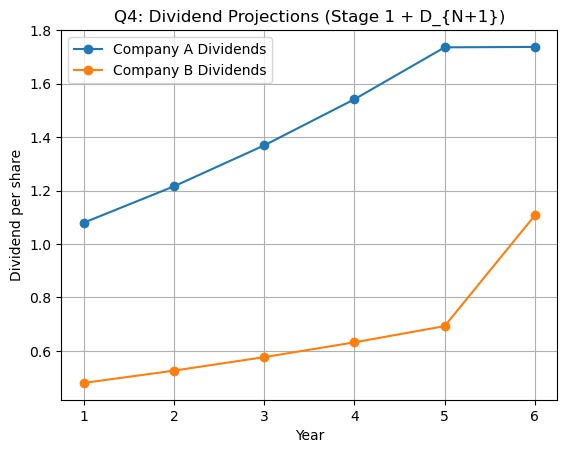

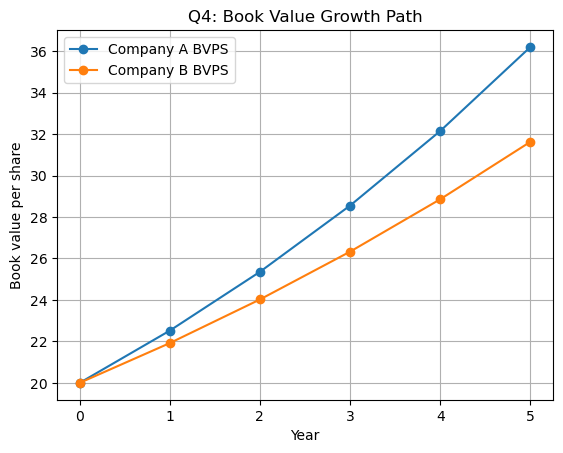

In [1]:
### Niraj Neupane

## Financial Micro Economics

# ============================================================
# Q4 — Two-Stage Dividend Discount Model (DDM) Valuation + Plots
# (Finance-focused, matches your “Voight-Kampff vs Mellow Destinations” style)
# ============================================================

import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# 1) Two-stage DDM using: Dividend_t = ROE_t * BV_{t-1} * payout_t
#    BV_t = BV_{t-1} + Retained Earnings = BV_{t-1} + ROE_t * BV_{t-1} * (1 - payout_t)
# ----------------------------
def two_stage_ddm_price(
    bvps0,
    roe_stage1,
    payout_stage1,
    years_stage1,
    roe_stage2,
    payout_stage2,
    r,                 # cost of equity
    shares=1.0
):
    """
    Returns price per share and arrays for plotting.
    Stage1 for years 1..N with (roe_stage1, payout_stage1)
    Stage2 from year N+1 onward with (roe_stage2, payout_stage2) and constant growth g
    """
    N = int(years_stage1)
    bv = [float(bvps0)]
    divs = []
    disc_divs = []

    # Stage 1
    for t in range(1, N+1):
        D_t = roe_stage1 * bv[-1] * payout_stage1
        divs.append(D_t)
        disc_divs.append(D_t / ((1+r)**t))
        bv_next = bv[-1] + roe_stage1 * bv[-1] * (1 - payout_stage1)
        bv.append(bv_next)

    # Stage 2 (terminal)
    # Long-run growth g = ROE2 * retention2
    g = roe_stage2 * (1 - payout_stage2)
    # Dividend at N+1 based on BV_N
    D_N1 = roe_stage2 * bv[-1] * payout_stage2

    if r <= g:
        raise ValueError("Need r > g for a stable terminal value in Gordon Growth Model.")

    terminal_value_at_N = D_N1 / (r - g)
    pv_terminal = terminal_value_at_N / ((1+r)**N)

    price = (sum(disc_divs) + pv_terminal) / shares

    # For plots: include D_{N+1} too
    years = np.arange(1, N+2)
    divs_plot = np.array(divs + [D_N1], dtype=float)

    return price, years, divs_plot, np.array(bv, dtype=float), pv_terminal

# ----------------------------
# 2) Example for TWO companies (replace inputs with your question’s numbers)
# ----------------------------
# Company A (e.g., Voight-Kampff)
A_params = dict(
    bvps0=20.0,
    roe_stage1=0.18,
    payout_stage1=0.30,
    years_stage1=5,
    roe_stage2=0.12,
    payout_stage2=0.40,
    r=0.10
)

# Company B (e.g., Mellow Destinations)
B_params = dict(
    bvps0=20.0,
    roe_stage1=0.12,
    payout_stage1=0.20,
    years_stage1=5,
    roe_stage2=0.10,
    payout_stage2=0.35,
    r=0.10
)

price_A, years_A, divs_A, bv_A, pvT_A = two_stage_ddm_price(**A_params)
price_B, years_B, divs_B, bv_B, pvT_B = two_stage_ddm_price(**B_params)

print("Q4: Price A (per share):", round(price_A, 4))
print("Q4: Price B (per share):", round(price_B, 4))
print("Higher value company:", "A" if price_A > price_B else "B")

# ----------------------------
# 3) Plots: dividends and book value paths
# ----------------------------
plt.figure()
plt.plot(years_A, divs_A, marker="o", label="Company A Dividends")
plt.plot(years_B, divs_B, marker="o", label="Company B Dividends")
plt.xlabel("Year")
plt.ylabel("Dividend per share")
plt.title("Q4: Dividend Projections (Stage 1 + D_{N+1})")
plt.grid(True)
plt.legend()
plt.show()

plt.figure()
plt.plot(np.arange(0, len(bv_A)), bv_A, marker="o", label="Company A BVPS")
plt.plot(np.arange(0, len(bv_B)), bv_B, marker="o", label="Company B BVPS")
plt.xlabel("Year")
plt.ylabel("Book value per share")
plt.title("Q4: Book Value Growth Path")
plt.grid(True)
plt.legend()
plt.show()

# ----------------------------
# Suggestions (optional):
# - Add sensitivity chart: price vs discount rate r
# - Add payout/ROE scenario table to show robustness
# - If your question provides dividends directly, use classic 2-stage DDM without BV dynamics
